In [56]:
#imports
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

In [14]:
#read csv
stroke_df = pd.read_csv('dataset/train.csv')
stroke_df.head().T

,0,1,2,3,4
id,0,1,2,3,4
gender,Male,Male,Female,Male,Female
age,28.0,33.0,42.0,56.0,24.0
hypertension,0,0,0,0,0
heart_disease,0,0,0,0,0
ever_married,Yes,Yes,Yes,Yes,No
work_type,Private,Private,Private,Private,Private
Residence_type,Urban,Rural,Rural,Urban,Rural
avg_glucose_level,79.53,78.44,103.0,64.87,73.36
bmi,31.1,23.9,40.3,28.8,28.8


In [15]:
#analise exploratoria
stroke_df.info() #não há valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


In [59]:
#subdivisão em numérico e categórico
df_num = stroke_df.select_dtypes(include=[np.number]).drop(columns=['id'])
df_cat = stroke_df.select_dtypes(include =[object]) 

In [17]:
#df_num.head().T
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
id,15304.0,7651.500000,4418.028595,0.00,3825.75,7651.50,11477.25,15303.0
age,15304.0,41.417708,21.444673,0.08,26.00,43.00,57.00,82.0
hypertension,15304.0,0.049726,0.217384,0.00,0.00,0.00,0.00,1.0
heart_disease,15304.0,0.023327,0.150946,0.00,0.00,0.00,0.00,1.0
avg_glucose_level,15304.0,89.039853,25.476102,55.22,74.90,85.12,96.98,267.6
bmi,15304.0,28.112721,6.722315,10.30,23.50,27.60,32.00,80.1
stroke,15304.0,0.041296,0.198981,0.00,0.00,0.00,0.00,1.0


In [13]:
#df_cat.head().T
df_cat.describe().T

,count,unique,top,freq
gender,15304,3,Female,9446
ever_married,15304,2,Yes,10385
work_type,15304,5,Private,9752
Residence_type,15304,2,Rural,7664
smoking_status,15304,4,never smoked,6281


<Axes: >

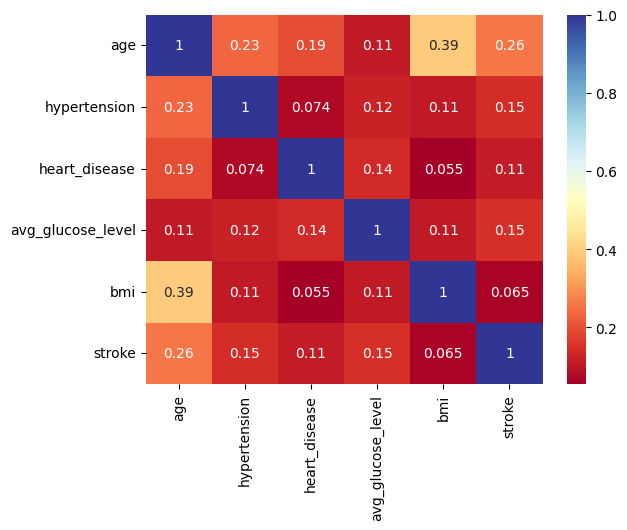

In [60]:
sns.heatmap(df_num.corr(),annot=True,cmap='RdYlBu')

<Axes: >

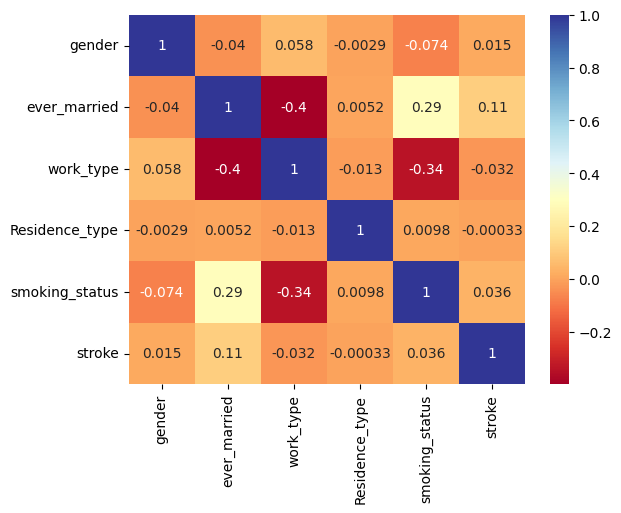

In [63]:
df_cat = df_cat.astype('category')
df_cat = df_cat.apply(lambda x : x.cat.codes)

df_cat['stroke'] = stroke_df['stroke']

sns.heatmap(df_cat.corr(),annot=True,cmap='RdYlBu')

In [ ]:
sns.pairplot(df_cat)

In [35]:
#stroke_df['gender'=='Female']
stroke_df.query("gender == 'Female'")['stroke'].value_counts()

stroke
0    9078
1     368
Name: count, dtype: int64

In [53]:
male = stroke_df.query("gender == 'Male'")['stroke'].value_counts()
female = stroke_df.query("gender == 'Female'")['stroke'].value_counts()

rate_male = male[1]/len(stroke_df)
rate_female = female[1]/len(stroke_df)

print('Porcentagem de homens c/ AVC:', round(rate_male*100, 2))
print('Porcentagem de mulheres c/ AVC:', round(rate_female*100, 2))

Porcentagem de homens c/ AVC: 1.73
Porcentagem de mulheres c/ AVC: 2.4


In [54]:
Rural = stroke_df.query("Residence_type == 'Rural'")['stroke'].value_counts()
Urban = stroke_df.query("Residence_type == 'Urban'")['stroke'].value_counts()

rate_Rural = Rural[1]/len(stroke_df)
rate_Urban = Urban[1]/len(stroke_df)

print('Porcentagem de Rural c/ AVC:', round(rate_Rural*100, 2))
print('Porcentagem de Urbano c/ AVC:', round(rate_Urban*100, 2))

Porcentagem de Rural c/ AVC: 2.07
Porcentagem de Urbano c/ AVC: 2.06


In [45]:
female[1]

368

In [33]:
stroke_df.query("gender == 'Other'")['stroke'].value_counts()

stroke
0    1
Name: count, dtype: int64